# Climate Tweets Analysis

The purpose of this project is to analyze tweets. Tweets will be analyzed for sentiment and displayed in numerous ways.

## Import Libraries

In [1]:
import tweepy
import keys
import numpy as np
import pandas as pd
import datetime
import html
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib
import nltk
from wordcloud import WordCloud

## Call Twitter API v2

Gathers tweets from the Twitter API v2 using the python wrapper, Tweepy

In [2]:
#Initialize the twitter client
client = tweepy.Client(bearer_token = keys.Bearer, wait_on_rate_limit = True)

In [3]:
#Create timestamps
adjusted_datetime = datetime.datetime.now() + datetime.timedelta(days = -6, seconds = -60)
adjusted_datetime

datetime.datetime(2022, 12, 30, 4, 28, 39, 9318)

In [4]:
#Create date range
date_range = pd.date_range(start = adjusted_datetime, periods = 7)
date_range = date_range.strftime("%Y-%m-%d")
date_range

Index(['2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
       '2023-01-04', '2023-01-05'],
      dtype='object')

In [5]:
#Create time for tweets
adjusted_time = adjusted_datetime.strftime("%H:%M:%S")
adjusted_time

'04:28:39'

In [6]:
##Create a dataframe to store the tweets
tweets_dataset = pd.DataFrame()

In [7]:
#Query twitter for tweets concerning climate change
query = "(climate change OR climate) -is:retweet -is:reply lang:en"

for date in date_range:
    tweets = tweepy.Paginator(client.search_recent_tweets, 
                                         query = query, 
                                         tweet_fields = ["created_at","context_annotations"],
                                         end_time = date + "T" + adjusted_time + "Z",
                                         expansions = "author_id",
                                         max_results = 100).flatten(limit = 2000)
    tweets_df = pd.DataFrame(tweets)
    tweets_dataset = pd.concat([tweets_dataset, tweets_df], axis = 0)
    
tweets_dataset.reset_index(drop = True, inplace = True)

In [8]:
tweets_dataset.head()

,author_id,context_annotations,created_at,edit_history_tweet_ids,id,text,withheld
0,811865776655171585,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2022-12-30 04:28:28+00:00,[1608681402060476417],1608681402060476417,The latest The Sustainability Daily! https://t...,NaN
1,1597795564439363585,"[{'domain': {'id': '46', 'name': 'Business Tax...",2022-12-30 04:28:26+00:00,[1608681393781116929],1608681393781116929,Renewable energy often referred to as clean en...,NaN
2,227682918,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-12-30 04:28:04+00:00,[1608681302122692608],1608681302122692608,As if the world’s rainforests didn’t have enou...,NaN
3,150375299,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-12-30 04:27:49+00:00,[1608681235974623232],1608681235974623232,Governments Use 'Behavioural Psychology' To Pr...,NaN
4,1113793180439326720,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-12-30 04:27:40+00:00,[1608681200205561859],1608681200205561859,theres things to be criticized abt greta thunb...,NaN


In [9]:
#Save the dataset to an external file
tweets_dataset.to_csv("tweets_dataset.csv", encoding = "utf-8", mode = "w")

## Load Data

In [158]:
#Load the dataset
df = pd.read_csv("tweets_dataset.csv")
df.head()

,Unnamed: 0,author_id,context_annotations,created_at,edit_history_tweet_ids,id,text,withheld
0,0,811865776655171585,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2022-12-30 04:28:28+00:00,[1608681402060476417],1608681402060476417,The latest The Sustainability Daily! https://t...,NaN
1,1,1597795564439363585,"[{'domain': {'id': '46', 'name': 'Business Tax...",2022-12-30 04:28:26+00:00,[1608681393781116929],1608681393781116929,Renewable energy often referred to as clean en...,NaN
2,2,227682918,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-12-30 04:28:04+00:00,[1608681302122692608],1608681302122692608,As if the world’s rainforests didn’t have enou...,NaN
3,3,150375299,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-12-30 04:27:49+00:00,[1608681235974623232],1608681235974623232,Governments Use 'Behavioural Psychology' To Pr...,NaN
4,4,1113793180439326720,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-12-30 04:27:40+00:00,[1608681200205561859],1608681200205561859,theres things to be criticized abt greta thunb...,NaN


## Preprocessing

Clean the tweets for any duplicates, missing values, and errors

In [159]:
#Drop unintended columns
df = df.drop(columns = ["Unnamed: 0", "withheld"])
df.head()

,author_id,context_annotations,created_at,edit_history_tweet_ids,id,text
0,811865776655171585,"[{'domain': {'id': '131', 'name': 'Unified Twi...",2022-12-30 04:28:28+00:00,[1608681402060476417],1608681402060476417,The latest The Sustainability Daily! https://t...
1,1597795564439363585,"[{'domain': {'id': '46', 'name': 'Business Tax...",2022-12-30 04:28:26+00:00,[1608681393781116929],1608681393781116929,Renewable energy often referred to as clean en...
2,227682918,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-12-30 04:28:04+00:00,[1608681302122692608],1608681302122692608,As if the world’s rainforests didn’t have enou...
3,150375299,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-12-30 04:27:49+00:00,[1608681235974623232],1608681235974623232,Governments Use 'Behavioural Psychology' To Pr...
4,1113793180439326720,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-12-30 04:27:40+00:00,[1608681200205561859],1608681200205561859,theres things to be criticized abt greta thunb...


In [160]:
#Count the number of records
df.count()

author_id                 14000
context_annotations       10045
created_at                14000
edit_history_tweet_ids    14000
id                        14000
text                      14000
dtype: int64

In [161]:
#Identify any duplicate tweets
df["id"].duplicated().value_counts()

False    14000
Name: id, dtype: int64

In [162]:
#Look for any missing values
df.isnull().sum()

author_id                    0
context_annotations       3955
created_at                   0
edit_history_tweet_ids       0
id                           0
text                         0
dtype: int64

In [163]:
#Replace the missing values
df["context_annotations"] = df["context_annotations"].fillna("blank")
df.isnull().sum()

author_id                 0
context_annotations       0
created_at                0
edit_history_tweet_ids    0
id                        0
text                      0
dtype: int64

In [164]:
#Reorganize columns and drop some column
df = df[["id","text","context_annotations"]]
df.head()

,id,text,context_annotations
0,1608681402060476417,The latest The Sustainability Daily! https://t...,"[{'domain': {'id': '131', 'name': 'Unified Twi..."
1,1608681393781116929,Renewable energy often referred to as clean en...,"[{'domain': {'id': '46', 'name': 'Business Tax..."
2,1608681302122692608,As if the world’s rainforests didn’t have enou...,"[{'domain': {'id': '45', 'name': 'Brand Vertic..."
3,1608681235974623232,Governments Use 'Behavioural Psychology' To Pr...,"[{'domain': {'id': '47', 'name': 'Brand', 'des..."
4,1608681200205561859,theres things to be criticized abt greta thunb...,"[{'domain': {'id': '10', 'name': 'Person', 'de..."


In [165]:
#Create new df for sentiment analysis
text_df = pd.DataFrame(df[["text","context_annotations"]]).rename(columns = {"text" : "Text",
                                                                             "context_annotations" : "Context"})
text_df.head()

,Text,Context
0,The latest The Sustainability Daily! https://t...,"[{'domain': {'id': '131', 'name': 'Unified Twi..."
1,Renewable energy often referred to as clean en...,"[{'domain': {'id': '46', 'name': 'Business Tax..."
2,As if the world’s rainforests didn’t have enou...,"[{'domain': {'id': '45', 'name': 'Brand Vertic..."
3,Governments Use 'Behavioural Psychology' To Pr...,"[{'domain': {'id': '47', 'name': 'Brand', 'des..."
4,theres things to be criticized abt greta thunb...,"[{'domain': {'id': '10', 'name': 'Person', 'de..."


In [166]:
#Clean the text for unnecessary text and punctuation
def basic_cleaning(text):
    text = html.unescape(text)
    text = re.sub(r"#","",text)
    text = re.sub(r"\n"," ",text) 
    text = re.sub(r"https?:\/\/.\S+", "", text)
    text = re.sub(r"  ", " ", text)
    text = re.sub(r"\xa0", " ", text)
    text = text.strip()
    return text

In [167]:
text_df["Text"] = text_df["Text"].apply(lambda x : basic_cleaning(x))
text_df.head()

,Text,Context
0,The latest The Sustainability Daily! climate c...,"[{'domain': {'id': '131', 'name': 'Unified Twi..."
1,Renewable energy often referred to as clean en...,"[{'domain': {'id': '46', 'name': 'Business Tax..."
2,As if the world’s rainforests didn’t have enou...,"[{'domain': {'id': '45', 'name': 'Brand Vertic..."
3,Governments Use 'Behavioural Psychology' To Pr...,"[{'domain': {'id': '47', 'name': 'Brand', 'des..."
4,theres things to be criticized abt greta thunb...,"[{'domain': {'id': '10', 'name': 'Person', 'de..."


## Sentiment Analysis

Run sentiment analysis on the tweets and then conduct further analysis

In [168]:
#Calculate the sentiment of tweets using vaderSentiment
analyzer = SentimentIntensityAnalyzer()

text_df["Positive"] = text_df["Text"].apply(lambda x: analyzer.polarity_scores(x)["pos"])
text_df["Neutral"] = text_df["Text"].apply(lambda x: analyzer.polarity_scores(x)["neu"])
text_df["Negative"] = text_df["Text"].apply(lambda x: analyzer.polarity_scores(x)["neg"])
text_df["Compound"] = text_df["Text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
text_df.head()

,Text,Context,Positive,Neutral,Negative,Compound
0,The latest The Sustainability Daily! climate c...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",0.000,1.000,0.000,0.0000
1,Renewable energy often referred to as clean en...,"[{'domain': {'id': '46', 'name': 'Business Tax...",0.343,0.657,0.000,0.8591
2,As if the world’s rainforests didn’t have enou...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",0.044,0.733,0.223,-0.7096
3,Governments Use 'Behavioural Psychology' To Pr...,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",0.000,1.000,0.000,0.0000
4,theres things to be criticized abt greta thunb...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0.132,0.830,0.038,0.6486


#### Classification Visualization

In [169]:
#Categorize each tweet based on their compound value
def overall_sent(value):
    result = ""
    if value > 0:
        result = "Positive"
    if value < 0:
        result = "Negative"
    if value == 0:
        result = "Neutral"
    return result

text_df["Overall_Sentiment"] = text_df["Compound"].apply(lambda x: overall_sent(x))
text_df.head()

,Text,Context,Positive,Neutral,Negative,Compound,Overall_Sentiment
0,The latest The Sustainability Daily! climate c...,"[{'domain': {'id': '131', 'name': 'Unified Twi...",0.000,1.000,0.000,0.0000,Neutral
1,Renewable energy often referred to as clean en...,"[{'domain': {'id': '46', 'name': 'Business Tax...",0.343,0.657,0.000,0.8591,Positive
2,As if the world’s rainforests didn’t have enou...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",0.044,0.733,0.223,-0.7096,Negative
3,Governments Use 'Behavioural Psychology' To Pr...,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",0.000,1.000,0.000,0.0000,Neutral
4,theres things to be criticized abt greta thunb...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0.132,0.830,0.038,0.6486,Positive


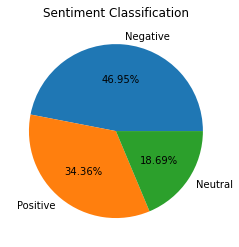

In [170]:
#Visualize classification distribution
text_df["Overall_Sentiment"].value_counts().plot.pie(rot = 0, autopct="%1.2f%%");
plt.title("Sentiment Classification");
plt.ylabel("");

### Descriptive Statistics

In [171]:
#View the descriptive statistics of the tweets
text_df[["Positive","Neutral","Negative","Compound"]].describe().round(3)

,Positive,Neutral,Negative,Compound
count,14000.000,14000.000,14000.000,14000.000
mean,0.082,0.805,0.113,-0.058
std,0.106,0.141,0.123,0.491
min,0.000,0.000,0.000,-0.997
25%,0.000,0.719,0.000,-0.511
50%,0.042,0.805,0.087,0.000
75%,0.142,0.905,0.196,0.318
max,1.000,1.000,1.000,0.987


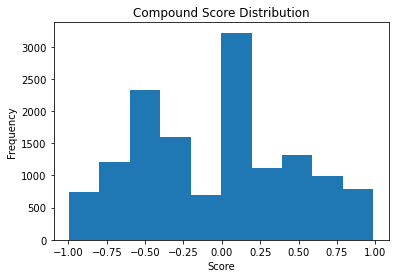

In [172]:
#Show the descriptive statistics of the tweets
text_df["Compound"].plot.hist(bins = 10);
plt.title("Compound Score Distribution");
plt.xlabel("Score");

## Further Analysis

In [173]:
#Create dataframes to be used in further analysis
temp_df = text_df[["Text","Context","Compound","Overall_Sentiment"]]

#Sperate the tweets between positive and negative sentiment
positive_df = temp_df.loc[temp_df["Overall_Sentiment"] == "Positive"]
negative_df = temp_df.loc[temp_df["Overall_Sentiment"] == "Negative"]

### Most Polarizing Tweets

View the tweets who have the highest negative and positive compound sentiment score

In [174]:
#Display the tweets with the highest compound score
positive_df[["Text","Compound"]].nlargest(5,["Compound"])

,Text,Compound
5576,1.9 Billion to Ukraine For Weapons. Not Includ...,0.9872
5454,Wishing Twitter friends a good 2023. I’m prayi...,0.9854
3741,Maybe with lot of plastic surgeries like you d...,0.9838
1229,My cat Milo loves @MichaelBennet. He’s just so...,0.9832
2429,"Happy New Year, Tweeter friends 🎉 2023! Lookin...",0.9796


In [175]:
#Display the tweets with the lowest compound score
negative_df[["Text","Compound"]].nsmallest(5,["Compound"])

,Text,Compound
2380,Balenciaga abducting / torturing / raping chil...,-0.9969
2192,Nah just know that these the typa people u arg...,-0.9891
13580,Man made climate change - scam Green energy - ...,-0.9854
13225,"People talk to me about ""right wing"" and ""left...",-0.9813
13234,"People talk to me about ""right wing"" and ""left...",-0.9813


## Bag of Words

Create a bag of words model to view the most frequent words used

In [176]:
#Create dataframes for two seperate bag of words models
positive_text = positive_df["Text"]
negative_text = negative_df["Text"]

In [177]:
#Clean the text to be more easily used in bag of words
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words("english")

def bow_clean(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]","",text)
    text = text.strip()
    words = wpt.tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    text = " ".join(filtered_words)
    return text

In [178]:
positive_text

1        Renewable energy often referred to as clean en...
4        theres things to be criticized abt greta thunb...
8        Once more, after Social Darwinism, science, cl...
14       "Sustainable" means fewer people sucking up na...
17       On Dec 22, 2022, I successfully defended my Ph...
                               ...                        
13980    Why everyone is going to need a heat pump!! Ye...
13981    Why methane emissions matter to climate change...
13983    What is agroecology - and how can it help us f...
13985    China's ambitions in green development have pr...
13994    LONG COVID and CLIMATE AWARENESS: as the pande...
Name: Text, Length: 4811, dtype: object

In [179]:
positive_text = positive_text.apply(lambda x: bow_clean(x))
negative_text = negative_text.apply(lambda x: bow_clean(x))

positive_text.head()

1     renewable energy often referred clean energy c...
4     theres things criticized abt greta thunberg es...
8     social darwinism science climate science makes...
14    sustainable means fewer people sucking natural...
17    dec 22 2022 successfully defended phd thesis i...
Name: Text, dtype: object

In [180]:
#Word Counter
def word_counter(text, word_dictionary):
    for i in range(len(text)):
            temp_list = text.iloc[i].split()
            for word in temp_list:
                if word not in word_dictionary:
                    word_dictionary.setdefault(word, 1)
                else:
                    word_dictionary[word] += 1

In [181]:
#Count the words from the positive tweets
positive_dictionary = {}
word_counter(positive_text, positive_dictionary)

In [182]:
#Display results
positive_words_df = pd.DataFrame(positive_dictionary.items(), columns = ["Words","Count"])
positive_words_df.sort_values("Count", ascending = False).head(10)

,Words,Count
21,climate,4695
100,change,1950
234,year,469
256,new,434
137,like,370
61,people,337
1,energy,330
268,us,295
106,world,263
124,one,241


In [183]:
#Count the words from the negative tweets
negative_dictionary = {}
word_counter(negative_text, negative_dictionary)

In [184]:
#Display results
negative_words_df = pd.DataFrame(negative_dictionary.items(), columns = ["Words","Count"])
negative_words_df.sort_values("Count", ascending = False).head(10)

,Words,Count
33,climate,6498
34,change,2193
45,snow,1912
39,high,1554
41,low,1529
43,precip,1503
44,missing,1126
3955,jan,932
1855,00,913
37,dec,595


### Word Cloud

Create a word cloud to visualize the results of the bag of word model

In [185]:
#Create a corpus from the dataframes
positive_words = " ".join([words for words in positive_text])
negative_words = " ".join([words for words in negative_text])

In [186]:
#Keeps the stopwords from the Word Cloud
blank_list = ""

In [187]:
#Darken the blue colormap
blue_colormap = matplotlib.cm.Blues(np.linspace(0,1,17))
blue_colormap = matplotlib.colors.ListedColormap(blue_colormap[-10:,:-1])

In [188]:
#Positive wordcloud settings
positive_wordcloud = WordCloud(width = 1200, height = 600,
                      background_color = "white",
                      collocations = False,
                      colormap = blue_colormap,
                      stopwords = blank_list,
                      normalize_plurals = False,         
                      max_words = 75).generate(positive_words)

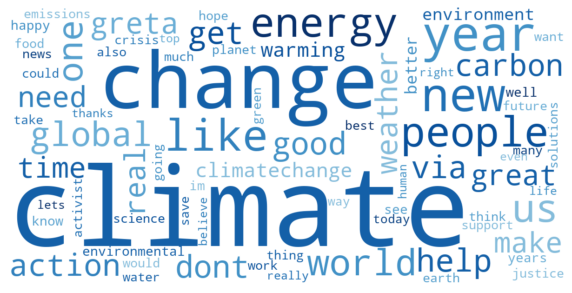

In [189]:
#Create the wordcloud
plt.figure(figsize = (10,10))
plt.imshow(positive_wordcloud, interpolation = "bilinear")
plt.axis("off");

In [190]:
#Darken the colormap
red_colormap = matplotlib.cm.Reds(np.linspace(0,1,17))
red_colormap = matplotlib.colors.ListedColormap(red_colormap[-10:,:-1])

In [191]:
#Negative wordcloud settings
negative_wordcloud = WordCloud(width = 1200, height = 600,
                      background_color = "white",
                      collocations = False,
                      colormap = red_colormap,
                      stopwords = blank_list,
                      normalize_plurals = False,
                      max_words = 75).generate(negative_words)

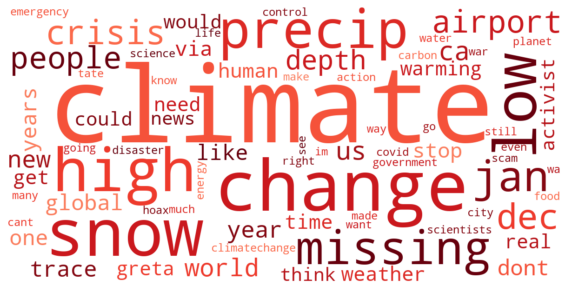

In [192]:
#Create the word cloud
plt.figure(figsize = (10,10))
plt.imshow(negative_wordcloud, interpolation = "bilinear")
plt.axis("off");

## Context Annotations

Analyze the context annotations provided by twitter

In [193]:
#Count the different kinds of context annotations

def context_count(df, context_dictionary):
    for i in range(df["Context"].shape[0]):
        if df["Context"].iloc[i] != "blank":
            temp_list = re.findall(r"'entity': {'id': .* 'name': '(.*?)'", str(df["Context"].iloc[i]))
            for item in temp_list:
                if item not in context_dictionary:
                    context_dictionary.setdefault(item, 1)
                else:
                    context_dictionary[item] += 1
        else:
            continue

In [194]:
#Convert the dictionary into a dataframe
context_dictionary = {}
context_count(text_df,context_dictionary)
context_entities = pd.DataFrame(context_dictionary.items(), columns = ["Context", "Count"])

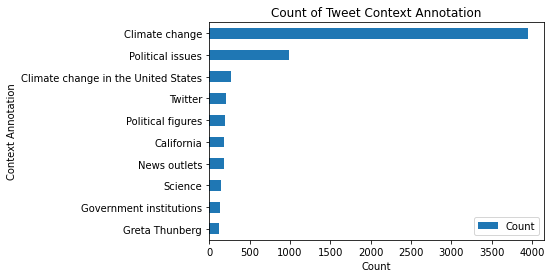

In [200]:
#Visualize the dataframe
context_plot = context_entities.sort_values("Count").tail(10)
context_plot.plot(x = "Context", y = "Count", kind = "barh");
plt.title("Count of Tweet Context Annotation");
plt.xlabel("Count");
plt.ylabel("Context Annotation");

#### Context Annotation Differences

In [201]:
#Count the context annotations from positive tweets
positive_dictionary = {}
context_count(positive_df,positive_dictionary)
positive_context_entities = pd.DataFrame(positive_dictionary.items(), columns = ["Context", "Count"])

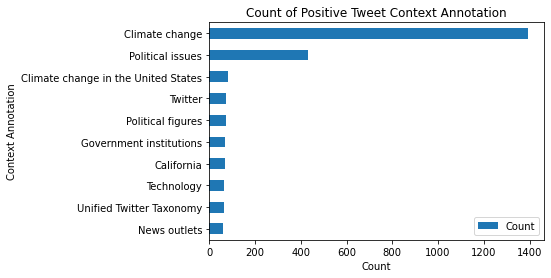

In [202]:
#Visualize the results
positive_context_plot = positive_context_entities.sort_values("Count").tail(10)
positive_context_plot.plot(x = "Context", y = "Count", kind = "barh");
plt.title("Count of Positive Tweet Context Annotation");
plt.xlabel("Count");
plt.ylabel("Context Annotation");

In [203]:
#Count the context annotations from negative tweets
negative_dictionary = {}
context_count(negative_df,negative_dictionary)
negative_context_entities = pd.DataFrame(negative_dictionary.items(), columns = ["Context", "Count"])

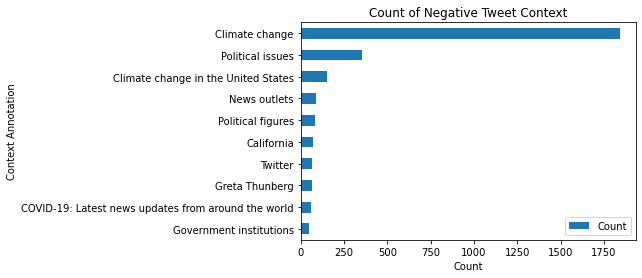

In [204]:
#Visualize the results      
negative_context_plot = negative_context_entities.sort_values("Count").tail(10)
negative_context_plot.plot(x = "Context", y = "Count", kind = "barh");
plt.title("Count of Negative Tweet Context");
plt.xlabel("Count");
plt.ylabel("Context Annotation");